# FMCG SALES ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the csv file 

In [2]:
data = pd.read_csv('Raw Sales Data.csv')
data.head()

,Month,Channel,Sub-Channels,Product Name,Category,Qty,Sales
0,01-Dec-20,Marketplace,AMAZON,ALOE + AMLA JUICE 1 L,Juices,"1,116","4,28,700"
1,01-Dec-20,Marketplace,AMAZON,ALOE + GARCINIA JUICE 1 L,Juices,"3,003","13,74,831"
2,01-Dec-20,Marketplace,AMAZON,ALOE VERA JUICE 1 L,Juices,"2,962","7,32,167"
3,01-Dec-20,Marketplace,AMAZON,ALOE VERA SKIN GEL 500 GM,Gourmet Nutrition,"1,004","3,77,100"
4,01-Dec-20,Marketplace,AMAZON,NEEM JUICE 1 L,Juices,555,"1,52,287"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Month         224 non-null    object
 1   Channel       224 non-null    object
 2   Sub-Channels  224 non-null    object
 3   Product Name  224 non-null    object
 4   Category      224 non-null    object
 5   Qty           224 non-null    object
 6   Sales         224 non-null    object
dtypes: object(7)
memory usage: 12.4+ KB


#### Removing commas from the quantity and sales column and converting them to suitable datatype

In [4]:
data["Qty"] = data["Qty"].str.replace(',','').astype('int')
data["Sales"] = data["Sales"].str.replace(',','').astype('float')

#### Converting the month column to datetime datatype

In [5]:
data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Month         224 non-null    datetime64[ns]
 1   Channel       224 non-null    object        
 2   Sub-Channels  224 non-null    object        
 3   Product Name  224 non-null    object        
 4   Category      224 non-null    object        
 5   Qty           224 non-null    int32         
 6   Sales         224 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(4)
memory usage: 11.5+ KB


#### Creating a new column called "Sales Month" by extracting month name from "Month" column


In [6]:
data['Sales Month'] = data['Month'].dt.month_name(locale ='English')


In [7]:
data.head()

,Month,Channel,Sub-Channels,Product Name,Category,Qty,Sales,Sales Month
0,2020-12-01,Marketplace,AMAZON,ALOE + AMLA JUICE 1 L,Juices,1116,428700.0,December
1,2020-12-01,Marketplace,AMAZON,ALOE + GARCINIA JUICE 1 L,Juices,3003,1374831.0,December
2,2020-12-01,Marketplace,AMAZON,ALOE VERA JUICE 1 L,Juices,2962,732167.0,December
3,2020-12-01,Marketplace,AMAZON,ALOE VERA SKIN GEL 500 GM,Gourmet Nutrition,1004,377100.0,December
4,2020-12-01,Marketplace,AMAZON,NEEM JUICE 1 L,Juices,555,152287.0,December


# Requirements

### Requirement 1 : Monthwise number of quantities sold


In [8]:
month_wise_qty = pd.DataFrame(data.groupby('Sales Month')['Qty'].sum().sort_values(ascending = False))
month_wise_qty

,Qty
Sales Month,
December,85427
March,80229
February,76393
January,67732


##### Showing the results in a bar graph

Text(0.5, 1.0, 'Quantity over months')

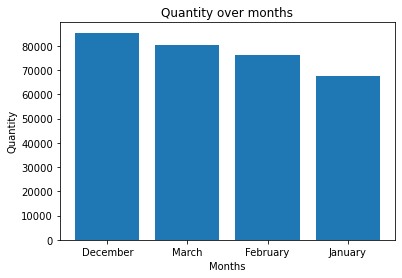

In [9]:
chart = plt.bar(month_wise_qty.index, month_wise_qty["Qty"])
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.title("Quantity over months")

### Requirement 2 :  Category wise Qty sold


In [11]:
cat_wise_qty = pd.DataFrame(data.groupby('Category')['Qty'].sum())
cat_wise_qty

,Qty
Category,
Functional nutrition,42354
Gourmet Nutrition,89279
Juices,178148


##### Showing the results in a bar graph

Text(0.5, 1.0, 'Category wise quantities sold')

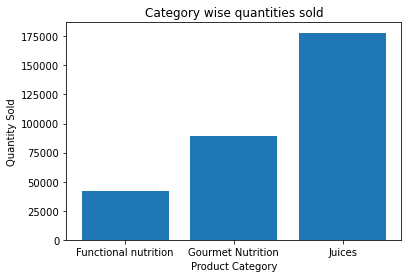

In [14]:
plt.bar(cat_wise_qty.index, cat_wise_qty["Qty"])
plt.xlabel("Product Category")
plt.ylabel("Quantity Sold")
plt.title("Category wise quantities sold")

### Requirement 3 : Sub-channel wise total sales


         Sub-Channels       Sales
0   Offline - Central    375332.0
1               GOQII    582600.0
2      Offline - East    811146.0
3      Offline -North   1206564.0
4          Big Basket   1207522.0
5     Offline - South   3446395.0
6            Flipkart   3770415.0
7        Offline - MT   6257948.0
8      Offline - West   6441427.0
9                 D2C  28047538.0
10             AMAZON  35606804.0


Text(0.5, 1.0, 'Sub Channel wise Sales')

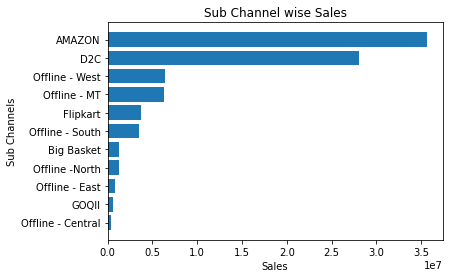

In [25]:
sub_channel_wise_sales = pd.DataFrame(data.groupby('Sub-Channels')['Sales'].sum().sort_values(ascending = True)).reset_index()
print(sub_channel_wise_sales)


plt.barh(sub_channel_wise_sales["Sub-Channels"], sub_channel_wise_sales["Sales"])
plt.xlabel("Sales")
plt.ylabel("Sub Channels")
plt.title("Sub Channel wise Sales")

### Requirement 4 : Highest sale in which month


In [26]:
highest_sale_month = pd.DataFrame(data.groupby(data['Sales Month'])["Sales"].sum().reset_index().max())
highest_sale_month

,0
Sales Month,March
Sales,25127827.0


### Requirement 5 : Highest selling product (based on sales) (packaging quantity doesn't matter. Ex. consider "GET SLIM JUICE 1 L" and "GET SLIM JUICE 500 ML" as one product)


In [27]:
data.head()

,Month,Channel,Sub-Channels,Product Name,Category,Qty,Sales,Sales Month
0,2020-12-01,Marketplace,AMAZON,ALOE + AMLA JUICE 1 L,Juices,1116,428700.0,December
1,2020-12-01,Marketplace,AMAZON,ALOE + GARCINIA JUICE 1 L,Juices,3003,1374831.0,December
2,2020-12-01,Marketplace,AMAZON,ALOE VERA JUICE 1 L,Juices,2962,732167.0,December
3,2020-12-01,Marketplace,AMAZON,ALOE VERA SKIN GEL 500 GM,Gourmet Nutrition,1004,377100.0,December
4,2020-12-01,Marketplace,AMAZON,NEEM JUICE 1 L,Juices,555,152287.0,December


In [28]:
#Spliting the values in "product Name" column from the numeric character and selecting the value at 0 index


import re 
data['Product'] = data['Product Name'].apply( lambda x : re.split('(\d+)',x)[0])

In [29]:
data.head()

,Month,Channel,Sub-Channels,Product Name,Category,Qty,Sales,Sales Month,Product
0,2020-12-01,Marketplace,AMAZON,ALOE + AMLA JUICE 1 L,Juices,1116,428700.0,December,ALOE + AMLA JUICE
1,2020-12-01,Marketplace,AMAZON,ALOE + GARCINIA JUICE 1 L,Juices,3003,1374831.0,December,ALOE + GARCINIA JUICE
2,2020-12-01,Marketplace,AMAZON,ALOE VERA JUICE 1 L,Juices,2962,732167.0,December,ALOE VERA JUICE
3,2020-12-01,Marketplace,AMAZON,ALOE VERA SKIN GEL 500 GM,Gourmet Nutrition,1004,377100.0,December,ALOE VERA SKIN GEL
4,2020-12-01,Marketplace,AMAZON,NEEM JUICE 1 L,Juices,555,152287.0,December,NEEM JUICE


In [31]:
highest_selling_product = data.groupby('Product').sum().sort_values('Sales' , ascending = False).reset_index().head()
highest_selling_product



plt.barh(highest_selling_product[""], sub_channel_wise_sales["Sales"])
plt.xlabel("Sales")
plt.ylabel("Sub Channels")
plt.title("Sub Channel wise Sales")

,Product,Qty,Sales
0,ALOE + GARCINIA JUICE,23585,12249252.0
1,HIMALAYA OIL,8009,12000055.0
2,GET SLIM JUICE,24731,9122552.0
3,ALOE VERA JUICE,28788,6024517.0
4,AMLA JUICE,34378,5862740.0


#### Requirement 6 : List of different products company is offering (packaging quantity doesn't matter. Ex. consider "GET SLIM JUICE 1 L" and "GET SLIM JUICE 500 ML" as one product)


In [ ]:
list_of_products = pd.DataFrame(data.groupby(['Sub-Channels','Product'])["Sales"].sum())
list_of_products



#### Requirement 7 : Create a single excel file to save all the outputs generated above in different subsheets. Email final output file and your python code (.ipynb) file

In [ ]:
xl_writer = pd.ExcelWriter('FMCG_Sales_data.xlsx')

month_wise_qty.to_excel(xl_writer , 'month wise sales')
cat_wise_qty.to_excel(xl_writer ,'category wise qty')
sub_channel_wise_sales.to_excel(xl_writer ,'sub channel wise sales' )
highest_sale_month.to_excel(xl_writer , 'highest sale month')
highest_selling_product.to_excel(xl_writer ,'highest selling product')
list_of_products.to_excel(xl_writer ,'list of products')

xl_writer.close()

